<a href="https://colab.research.google.com/github/gabrielcarcedo/Taller-Pre-Congreso-CNIB-2025-ML-en-Datos-Medicos/blob/main/Taller_Pre_Congreso_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning para Procesamiento de Datos Médicos**
---
## Taller Pre-Congreso CNIB 2025
---
<table>
  <tr>
      <h4><b>ISC. Gabriel Carcedo Rodríguez</b> (<i>PCIC - IIMAS, UNAM</i>): <a href= "mailto:gabrielcarcedo@comunidad.unam.mx">gabrielcarcedo@comunidad.unam.mx</a>
      <br>
      <br>
      <b>Ing. Ismael Pérez Ruiz</b> (<i>Universidad Modelo</i>): <a href= "mailto:CORREO">CORREO</a>
      <br>
      <br>
      <b>LCC. Victoria May Balam</b> (<i>PCIC - IIMAS, UNAM</i>): <a href= "mailto:victoria.mbalam@comunidad.unam.mx">victoria.mbalam@comunidad.unam.mx</a> </h4>
  </tr>
  <tr>
    <td width="60%" valign="top">
      <!-- Content for Column 1 -->
      <br>
      <br>
      <a href="https://www.pcic.unam.mx/">Posgrado en Ciencia e Ingeniería de la Computación</a>
    </td>
    <td width="40%" valign="top" style="text-align: center;">
      <!-- Content for Column 2 -->
      <a href="https://www.pcic.unam.mx/">
        <img src="https://pcic.posgrado.unam.mx/wp-content/uploads/Ciencia-e-Ingenieria-de-la-Computacion_color.png" alt="PCIC" style="width:100%; height:auto;">
      </a>
    </td>
  </tr>
  <tr>
    <td width="60%" valign="top">
      <!-- Content for Column 1 -->
      <br>
      <br>
      <a href="https://www.unimodelo.edu.mx/merida">Universidad Modelo</a>
    </td>
    <td width="40%" valign="top" style="text-align: center;">
      <!-- Content for Column 2 -->
      <a href="https://www.unimodelo.edu.mx/merida">
        <img src="https://servicios.unimodelo.edu.mx/merida/ing/practicas/resources/imgs/logo-modelo.png" alt="Universidad Modelo" style="width:100%; height:auto;">
      </a>
    </td>
  </tr>

</table>


# Paqueterías y Librerías 📦📚

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (5, 5)

# Dataset 📑: Healthcare Dataset Stroke

El archivo Healthcare-dataset-stroke-data.csv contiene información relacionada con la incidencia de accidentes cerebrovasculares y diversos factores relacionados con la salud. Este conjunto de datos se utiliza habitualmente en análisis de datos y tareas de aprendizaje automático para estudiar y predecir el riesgo de sufrir un accidente cerebrovascular.
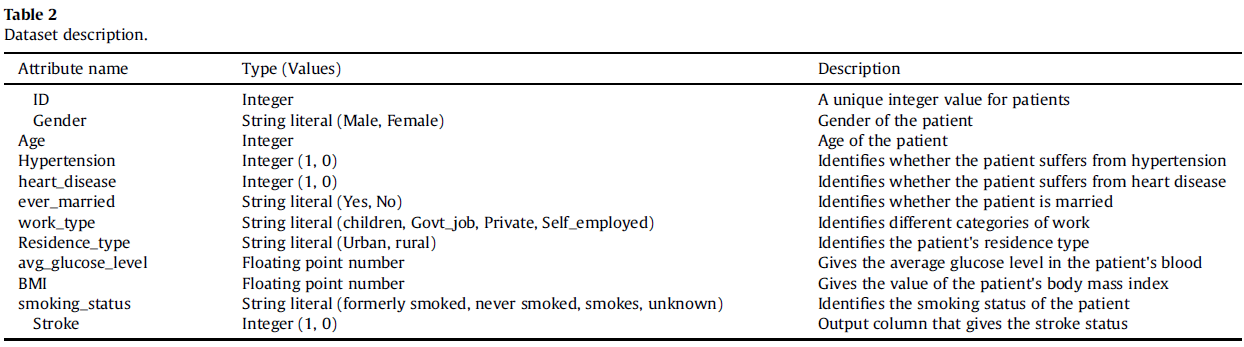

Imagen tomada de: Gupta, A.; Mishra, N.; Jatana, N.; Malik, S.; Gepreel, K.; Asmat, F.; Nandan, S. Predicting stroke risk: An effective stroke prediction model based on neural networks, Journal of Neurorestoratology, 2025, 100156,
https://doi.org/10.1016/j.jnrt.2024.100156.

In [10]:
import kagglehub
import os

# https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
dataset_handle = "fedesoriano/stroke-prediction-dataset"

path = kagglehub.dataset_download(dataset_handle)
print("Path to dataset files:", path)

print(os.listdir(path))

Using Colab cache for faster access to the 'stroke-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/stroke-prediction-dataset
['healthcare-dataset-stroke-data.csv']


In [113]:
data = pd.read_csv(os.path.join(path, "healthcare-dataset-stroke-data.csv"))
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# **Exploratory Data Analysis (EDA):**

In [13]:
data.shape

(5110, 12)

In [ ]:
data.columns

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [114]:
data.isnull().sum()    #conteo de valores nulos por columna

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


##**Lets fill Null Values**

In [16]:
data['bmi'].value_counts()     #cuenta la frecuencia de cada valor

,count
bmi,
28.7,41
28.4,38
27.7,37
27.6,37
26.7,37
...,...
47.9,1
13.0,1
13.9,1


In [17]:
data['bmi'].describe()

,bmi
count,4909.000000
mean,28.893237
std,7.854067
min,10.300000
25%,23.500000
50%,28.100000
75%,33.100000
max,97.600000


In [115]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())    #reemplazar los valores nulos con la media

In [116]:
data['bmi'].describe()

,bmi
count,5110.000000
mean,28.893237
std,7.698018
min,10.300000
25%,23.800000
50%,28.400000
75%,32.800000
max,97.600000


In [ ]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [117]:
data.drop('id',axis=1,inplace=True)    #eliminar columna id

In [118]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


## **Outlier Removal**

In [22]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

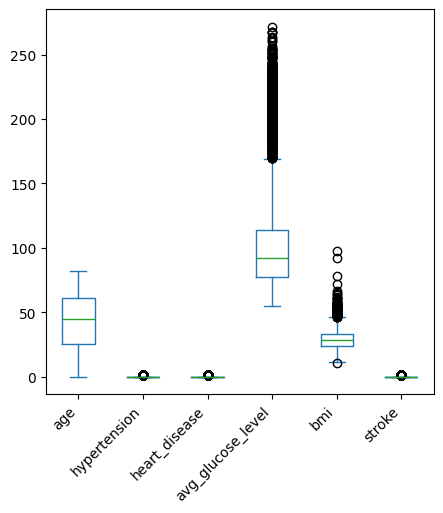

In [25]:
data.plot(kind='box')
plt.xticks(rotation=45, ha='right')
plt.show()

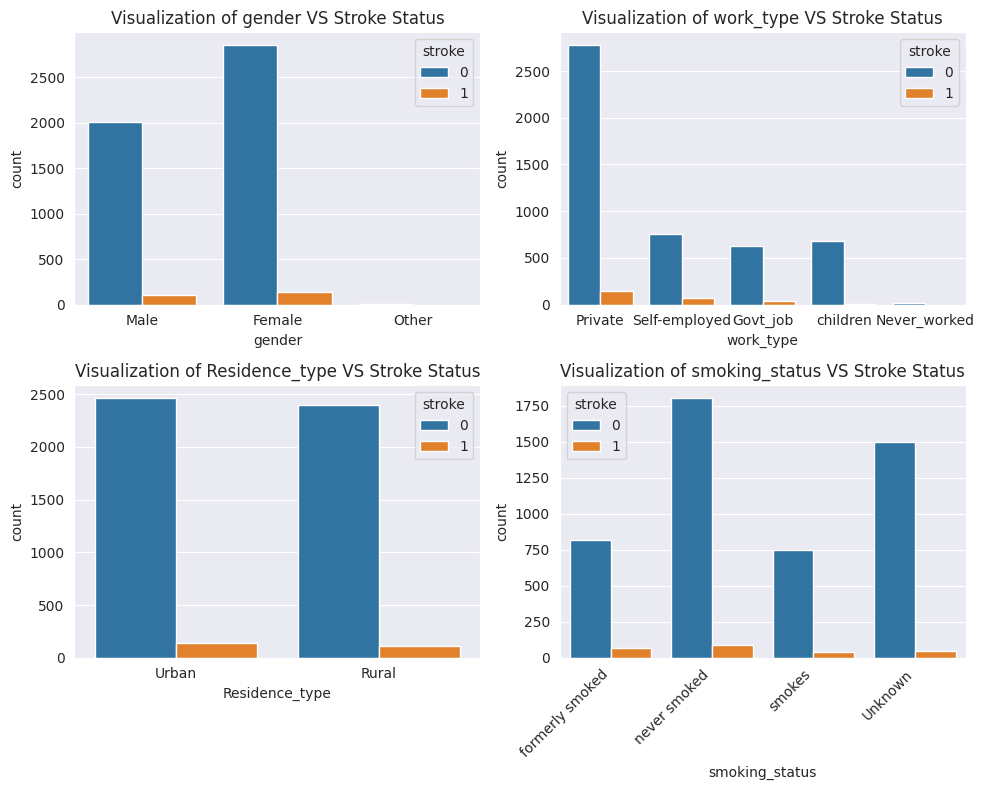

In [123]:
Patient_status=['gender','work_type','Residence_type','smoking_status']
fig, axs=plt.subplots(2,2, figsize=(10,8))
axs=axs.flatten()
for i, feature in enumerate(Patient_status):
    sns.countplot(data=data, x=feature, hue='stroke', ax=axs[i])
    axs[i].set_title(f'Visualization of {feature} VS Stroke Status')
    axs[i].set_xlabel(feature)


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Label Encoding**

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [29]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

#transforma datos de texto en numéricos
gender=enc.fit_transform(data['gender'])
smoking_status=enc.fit_transform(data['smoking_status'])
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [31]:
data['work_type']=work_type
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender

In [28]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


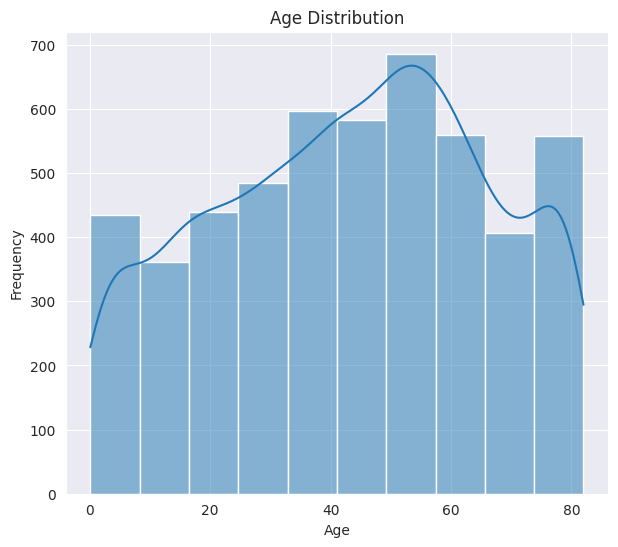

In [65]:
plt.figure(figsize=(7, 6))
sns.histplot(data['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

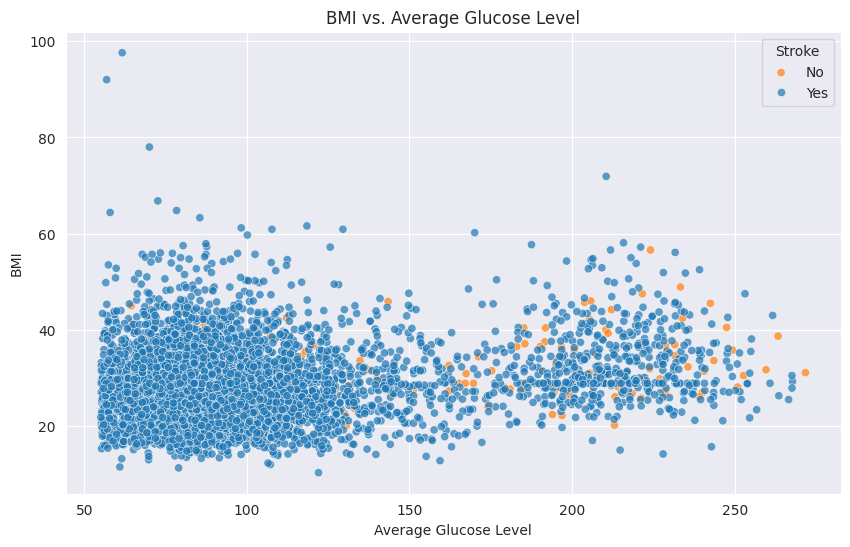

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='avg_glucose_level', y='bmi', hue='stroke', alpha=0.7)
plt.title('BMI vs. Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.show()

# Correlations

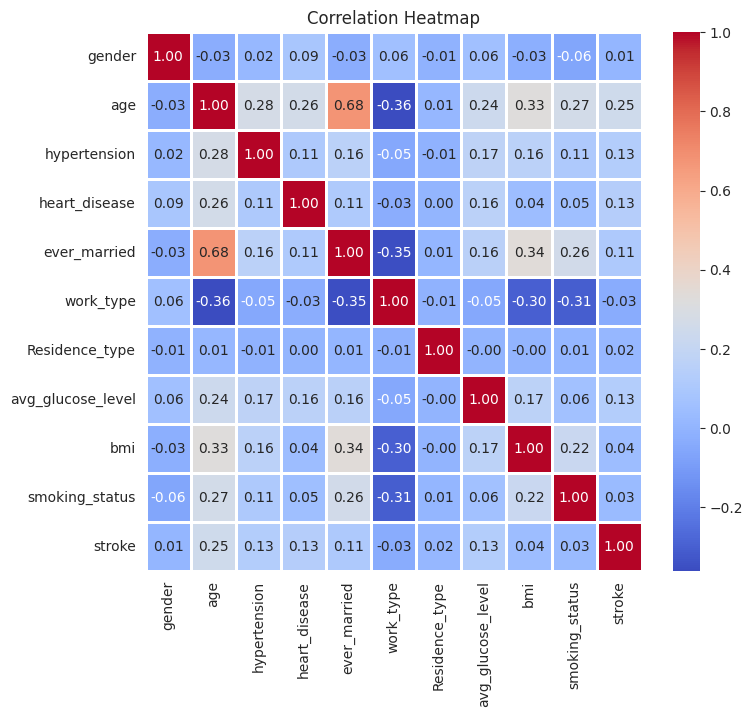

In [62]:
corrMatrix = data.corr()

plt.figure(figsize=(8, 7))

sns.heatmap(corrMatrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()


# Splitting the data for train and test

In [77]:
X=data.drop('stroke',axis=1)
Y=data['stroke']

In [78]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# StandardScaler (mean=0, variance=1)
scaler_std = StandardScaler()
X_scaled = X.copy()
X_scaled = scaler_std.fit_transform(X)

# MinMaxScaler (range: 0-1)
scaler_mm = MinMaxScaler()
X_mm = X.copy()
X_mm = scaler_mm.fit_transform(X)

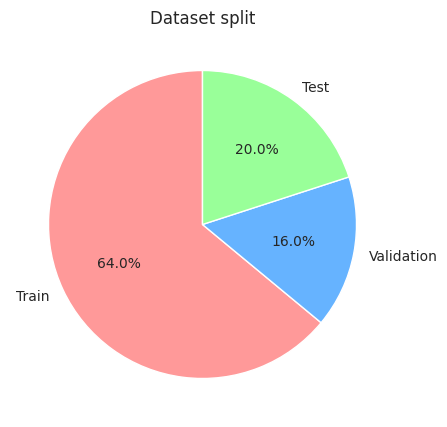

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y,
                                                    test_size=0.2,
                                                    stratify=Y,
                                                    random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
                                                  test_size=0.2,
                                                  stratify=Y_train,
                                                  random_state=1)

labels = ['Train', 'Validation', 'Test']
sizes = [len(Y_train), len(Y_val), len(Y_test)]
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Dataset split')
plt.show()

In [80]:
# Shape of dataset splits
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_val shape:', X_val.shape)
print('Y_val shape:', Y_val.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (3270, 10)
Y_train shape: (3270,)
X_val shape: (818, 10)
Y_val shape: (818,)
X_test shape: (1022, 10)
Y_test shape: (1022,)


# Training

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

ML_algorithms = [KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()]

knn_model = KNeighborsClassifier()
svm_model = SVC()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

ML_models = [knn_model, svm_model, dt_model, rf_model]

In [98]:
for model in ML_models:
    model.fit(X_train, Y_train)

In [99]:
for model in ML_models:
    print(model.__class__.__name__ + ' train accuracy: %.3f' % model.score(X_train, Y_train))
    print(model.__class__.__name__ + ' validation accuracy: %.3f' % model.score(X_val, Y_val))
    print(model.__class__.__name__ + ' test accuracy: %.3f' % model.score(X_test, Y_test))
    print()

KNeighborsClassifier train accuracy: 0.953
KNeighborsClassifier validation accuracy: 0.945
KNeighborsClassifier test accuracy: 0.944

SVC train accuracy: 0.952
SVC validation accuracy: 0.951
SVC test accuracy: 0.951

DecisionTreeClassifier train accuracy: 1.000
DecisionTreeClassifier validation accuracy: 0.917
DecisionTreeClassifier test accuracy: 0.904

RandomForestClassifier train accuracy: 1.000
RandomForestClassifier validation accuracy: 0.951
RandomForestClassifier test accuracy: 0.950



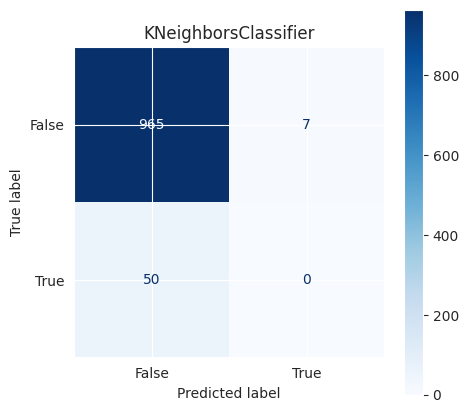

--- Reporte de Clasificación para KNeighborsClassifier ---
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.94      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.94      0.92      1022

--------------------------------------------------


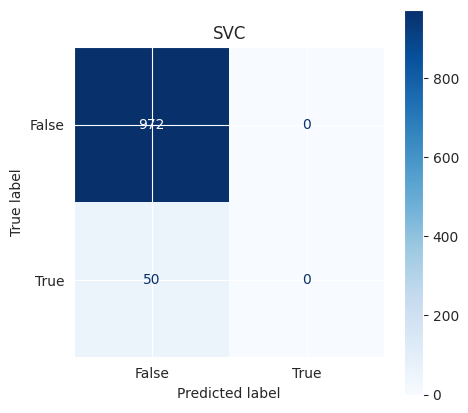

--- Reporte de Clasificación para SVC ---
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

--------------------------------------------------


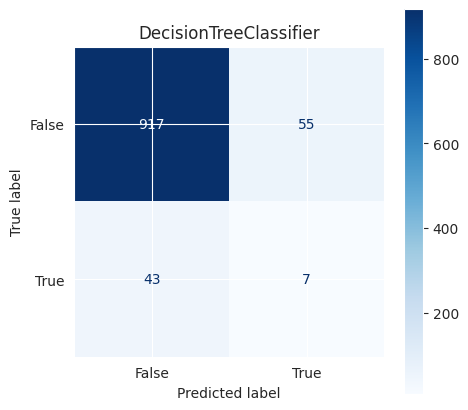

--- Reporte de Clasificación para DecisionTreeClassifier ---
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.11      0.14      0.12        50

    accuracy                           0.90      1022
   macro avg       0.53      0.54      0.54      1022
weighted avg       0.91      0.90      0.91      1022

--------------------------------------------------


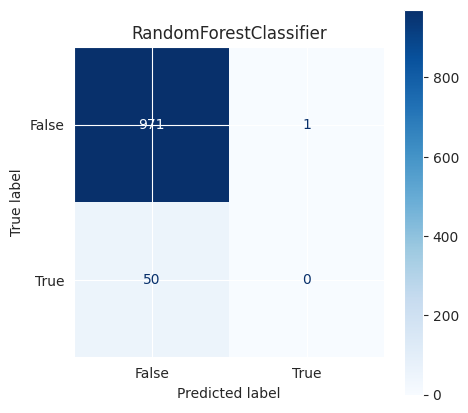

--- Reporte de Clasificación para RandomForestClassifier ---
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

--------------------------------------------------


In [103]:
from sklearn.metrics import classification_report

for model in ML_models:
    Y_pred = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
    cm_display.plot(cmap='Blues', values_format='d')
    plt.title(model.__class__.__name__)
    plt.show()

    print(f"--- Reporte de Clasificación para {model.__class__.__name__} ---")
    print(classification_report(Y_test, Y_pred, zero_division=0))
    print("-" * 50)


In [92]:
ordered_models = sorted(ML_models, key=lambda model: model.score(X_test, Y_test), reverse=True)

for model in ordered_models:
    print(model.__class__.__name__ + ': %.3f' % model.score(X_test, Y_test))

SVC: 0.951
RandomForestClassifier: 0.949
KNeighborsClassifier: 0.944
DecisionTreeClassifier: 0.899


Reentrenando SVC con probability=True...


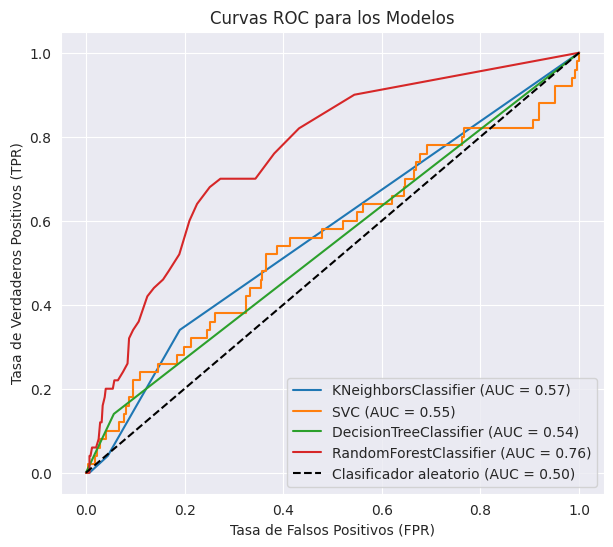

In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

plt.figure(figsize=(7, 6))

# Es crucial re-inicializar SVC con probability=True para que pueda calcular las probabilidades.
for i, model in enumerate(ML_models):
    if isinstance(model, SVC) and not hasattr(model, 'predict_proba'):
        print(f"Reentrenando SVC con probability=True...")
        model = SVC(probability=True, random_state=1)
        model.fit(X_train, Y_train)

    model_name = model.__class__.__name__

    if hasattr(model, 'predict_proba'):
        Y_prob = model.predict_proba(X_test)[:, 1]
    else:
        print(f"Advertencia: El modelo {model_name} no tiene el método 'predict_proba'. Se omitirá de la curva ROC.")
        continue

    roc_auc = roc_auc_score(Y_test, Y_prob)

    # Genera los valores de la curva ROC
    fpr, tpr, _ = roc_curve(Y_test, Y_prob)

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio (AUC = 0.50)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para los Modelos')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Upsampling

In [104]:
!pip install imbalanced-learn

In [105]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Asumiendo que X_train, Y_train ya están definidos

print("Balanceo antes de SMOTE:")
print(pd.Series(Y_train).value_counts())

smote = SMOTE(random_state=42)
X_train_res, Y_train_res = smote.fit_resample(X_train, Y_train)

print("\nBalanceo después de SMOTE:")
print(pd.Series(Y_train_res).value_counts())

Balanceo antes de SMOTE:
stroke
0    3111
1     159
Name: count, dtype: int64

Balanceo después de SMOTE:
stroke
0    3111
1    3111
Name: count, dtype: int64



--- Optimizando hiperparámetros con Grid Search ---

Resultados para el modelo: K-NN
  Mejor Score (Recall): 0.9984
  Mejores Parámetros: {'n_neighbors': 13, 'weights': 'distance'}

Resultados para el modelo: SVM
  Mejor Score (Recall): 0.9383
  Mejores Parámetros: {'C': 1, 'kernel': 'rbf'}

Resultados para el modelo: Decision Tree
  Mejor Score (Recall): 0.9257
  Mejores Parámetros: {'max_depth': 10, 'min_samples_leaf': 1}

Resultados para el modelo: Random Forest
  Mejor Score (Recall): 0.9669
  Mejores Parámetros: {'max_depth': 10, 'n_estimators': 100}

--- Evaluación Final de los Modelos Optimizados ---

--- Reporte de Clasificación para K-NN ---
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       972
           1       0.09      0.46      0.15        50

    accuracy                           0.75      1022
   macro avg       0.53      0.61      0.51      1022
weighted avg       0.92      0.75      0.82      1022


--- Reporte 

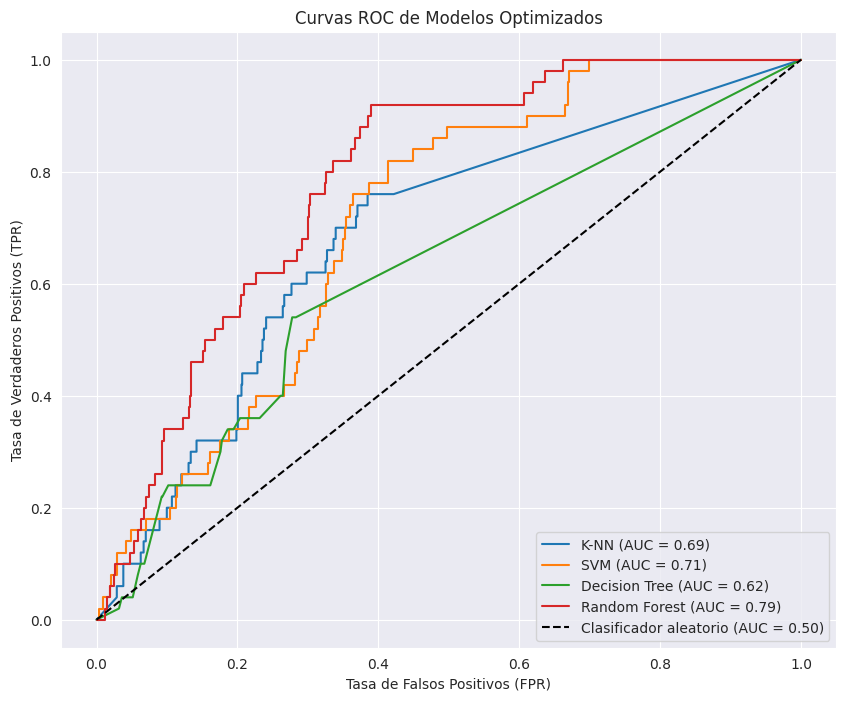

In [108]:
from sklearn.model_selection import GridSearchCV


# Definir y Optimizar los Modelos con GridSearch
# Define los hiperparámetros para cada modelo
models_and_params = {
    "K-NN": {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5, 9, 13],
            'weights': ['uniform', 'distance'],
        }
    },
    "SVM": {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'C': [0.1, 1],
            'kernel': ['rbf', 'linear'],
        }
    },
    "Decision Tree": {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 5, 10],
            'min_samples_leaf': [1, 2]
        }
    },
    "Random Forest": {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [5, 10],
        }
    }
}

best_models = {}

print("\n--- Optimizando hiperparámetros con Grid Search ---")
for name, data in models_and_params.items():
    model = data['model']
    params = data['params']

    # Crea la instancia de GridSearch
    grid_search = GridSearchCV(model, params, cv=5, scoring='recall', n_jobs=-1)

    # Entrena en los datos balanceados
    grid_search.fit(X_train_res, Y_train_res)

    # Guarda el mejor modelo y los mejores parámetros
    best_models[name] = grid_search.best_estimator_

    print(f"\nResultados para el modelo: {name}")
    print(f"  Mejor Score (Recall): {grid_search.best_score_:.4f}")
    print(f"  Mejores Parámetros: {grid_search.best_params_}")

# Evaluar los Modelos Optimizados y Generar Curvas ROC ---
plt.figure(figsize=(10, 8))
print("\n--- Evaluación Final de los Modelos Optimizados ---")

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n--- Reporte de Clasificación para {name} ---")
    print(classification_report(Y_test, y_pred, zero_division=0))

    # Calcula AUC y genera la curva ROC
    roc_auc = roc_auc_score(Y_test, y_prob)
    fpr, tpr, _ = roc_curve(Y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio (AUC = 0.50)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title("Curvas ROC de Modelos Optimizados")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()